In [2]:
!pip install keras-tuner

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv('C:/Users/nauti/OneDrive/Desktop/programs/SP_dataset.csv')

In [11]:
df.describe

<bound method NDFrame.describe of             Date         Open         High          Low        Close  \
0     03-01-2000  1469.250000  1478.000000  1438.359985  1455.219971   
1     04-01-2000  1455.219971  1455.219971  1397.430054  1399.420044   
2     05-01-2000  1399.420044  1413.270020  1377.680054  1402.109985   
3     06-01-2000  1402.109985  1411.900024  1392.099976  1403.449951   
4     07-01-2000  1403.449951  1441.469971  1400.729980  1441.469971   
...          ...          ...          ...          ...          ...   
5212  21-09-2020  3285.570068  3285.570068  3229.100098  3281.060059   
5213  22-09-2020  3295.750000  3320.310059  3270.949951  3315.570068   
5214  23-09-2020  3320.110107  3323.350098  3232.570068  3236.919922   
5215  24-09-2020  3226.139893  3278.699951  3209.449951  3246.590088   
5216  25-09-2020  3236.659912  3306.879883  3228.439941  3298.459961   

        Adj Close      Volume  
0     1455.219971   931800000  
1     1399.420044  1009000000  
2    

In [12]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2000,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
1,04-01-2000,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2,05-01-2000,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
3,06-01-2000,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
4,07-01-2000,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


In [13]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5212,21-09-2020,3285.570068,3285.570068,3229.100098,3281.060059,3281.060059,4828350000
5213,22-09-2020,3295.750000,3320.310059,3270.949951,3315.570068,3315.570068,3963300000
5214,23-09-2020,3320.110107,3323.350098,3232.570068,3236.919922,3236.919922,4364500000
5215,24-09-2020,3226.139893,3278.699951,3209.449951,3246.590088,3246.590088,4599470000
5216,25-09-2020,3236.659912,3306.879883,3228.439941,3298.459961,3298.459961,3792220000


In [14]:
df = df.set_index("Date") 
print(df.shape)
print(df.columns)

(5217, 6)
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [15]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
03-01-2000,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
04-01-2000,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
05-01-2000,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
06-01-2000,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
07-01-2000,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


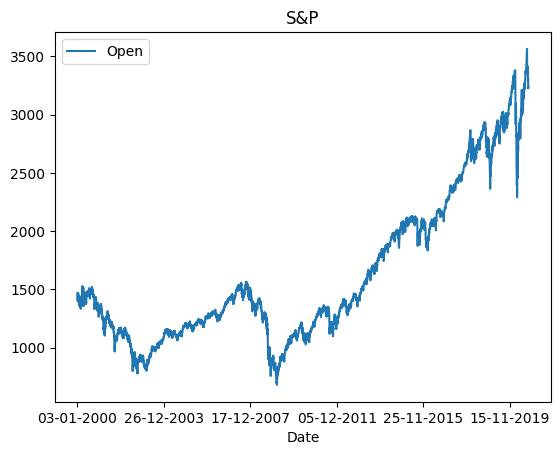

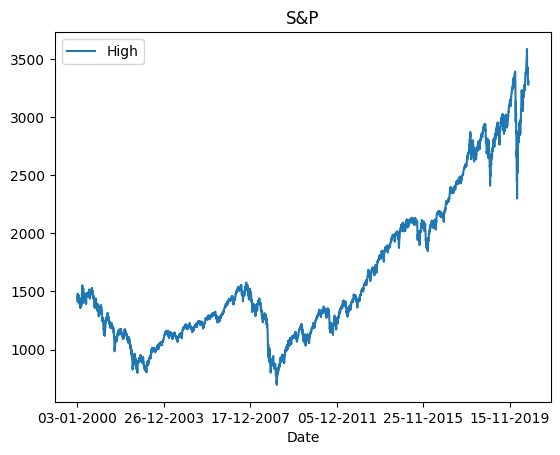

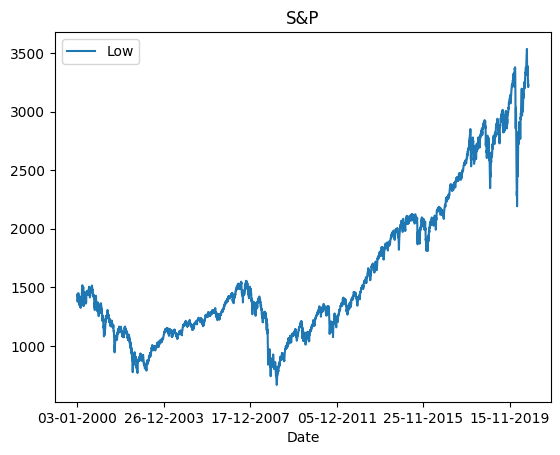

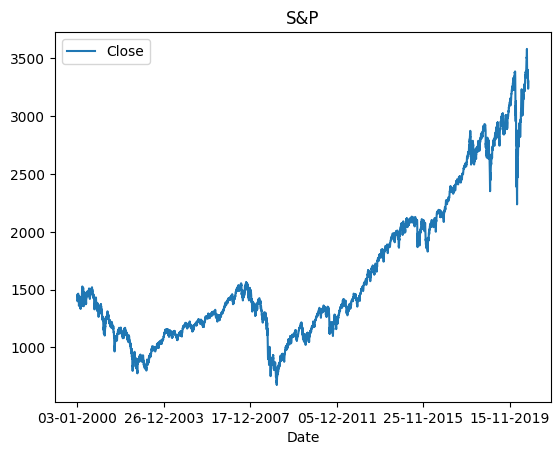

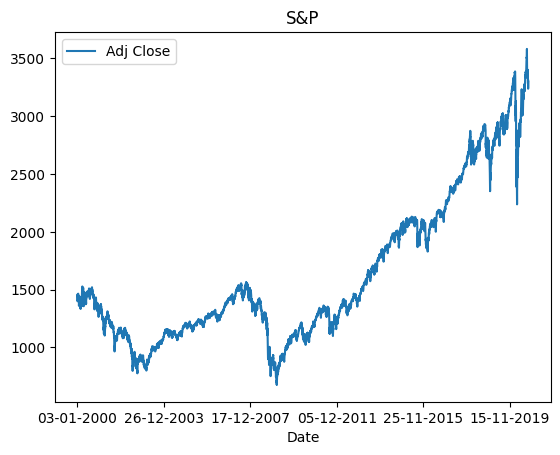

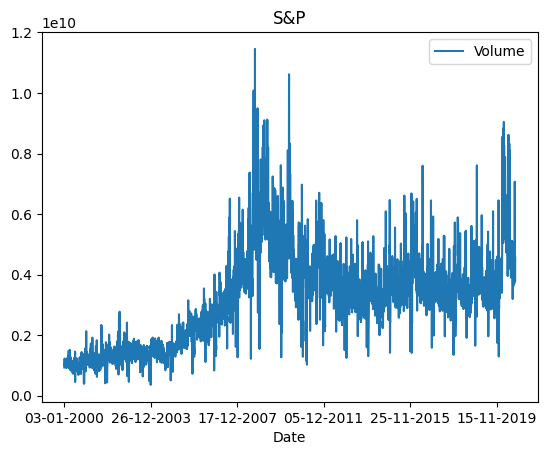

In [16]:
#plotting the every index plot with respect to date
for i in  df.columns:
  df[[i]].plot()
  plt.title("S&P")
  plt.show()

Text(0.5, 1.0, 'S&P Cumulative Returns')

<Figure size 2000x2000 with 0 Axes>

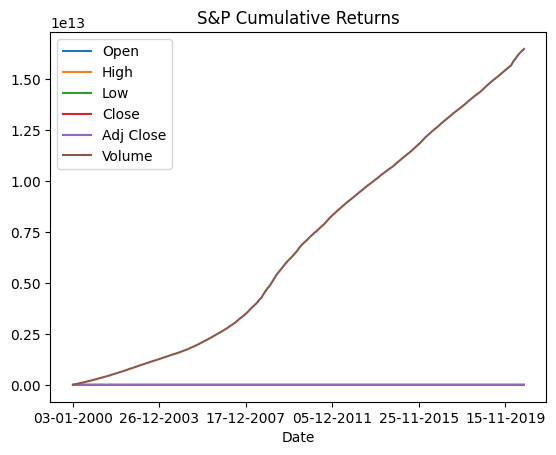

In [17]:
# Comulative Return
plt.figure(figsize=(20,20))
dr = df.cumsum()
dr.plot()
plt.title('S&P Cumulative Returns')

<Axes: xlabel='Date'>

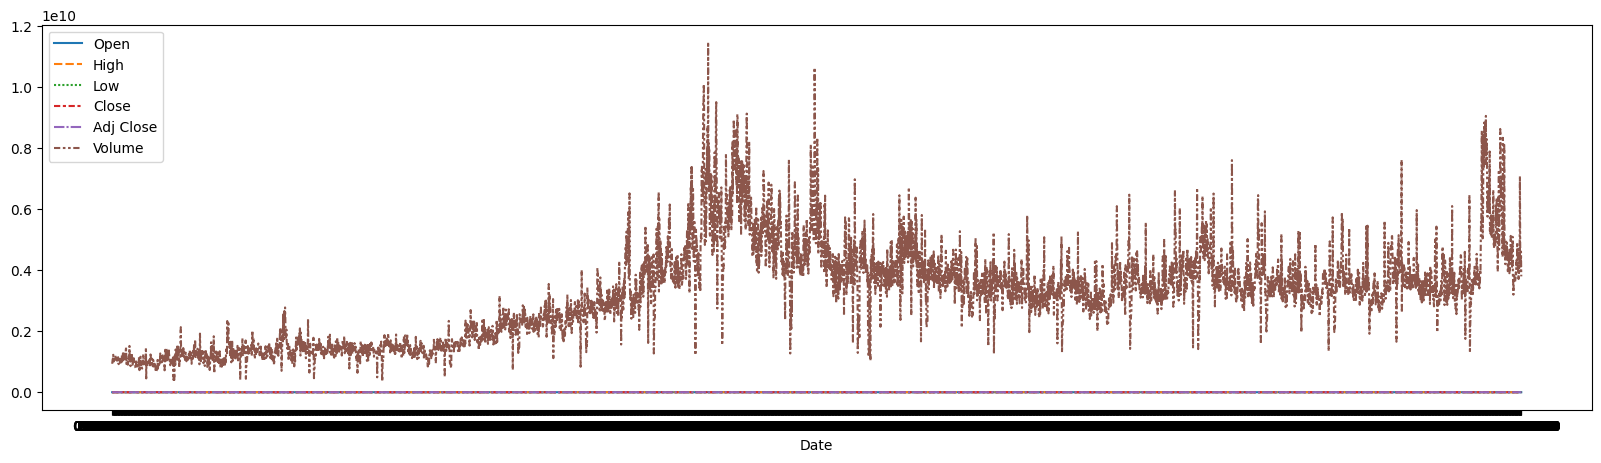

In [18]:
#ploting the line plot to see the trend in data set
plt.figure(figsize=(20,5))
sns.lineplot(data =df,)

<Axes: ylabel='Date'>

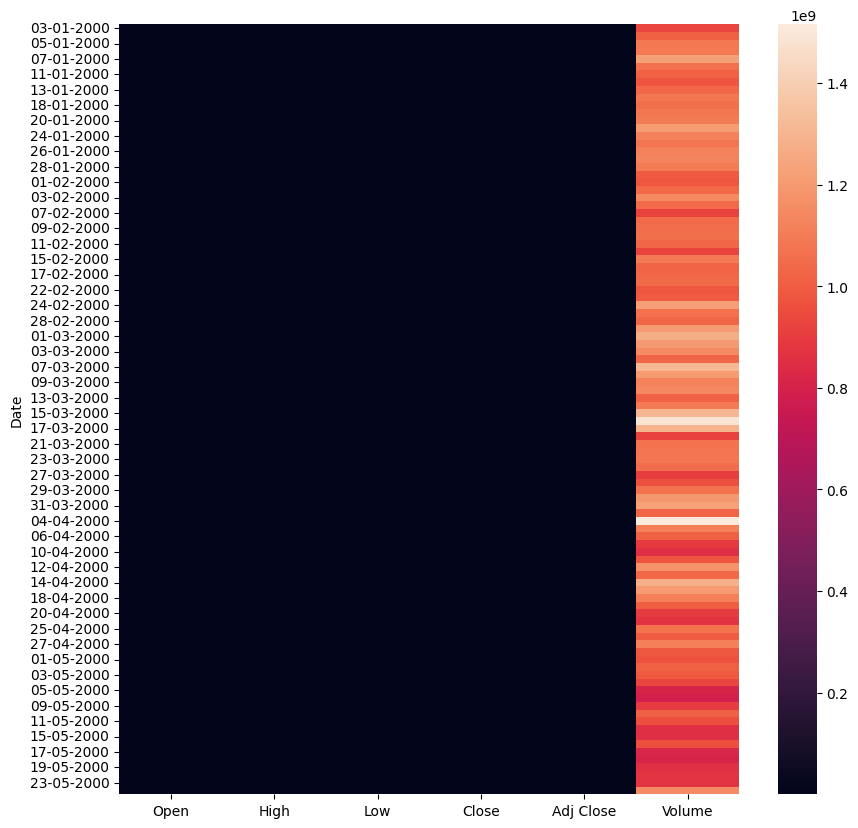

In [19]:
#drawing the heat map 
plt.figure(figsize=(10,10))
sns.heatmap(df[:100],   robust=False,
                annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, 
                 square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None)

(array([[10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  7.,  1.]]),
 array([1.37768005e+03, 1.22521240e+08, 2.45041102e+08, 3.67560964e+08,
        4.90080827e+08, 6.12600689e+08, 7.35120551e+08, 8.57640413e+08,
        9.80160276e+08, 1.10268014e+09, 1.22520000e+09]),
 <a list of 6 BarContainer objects>)

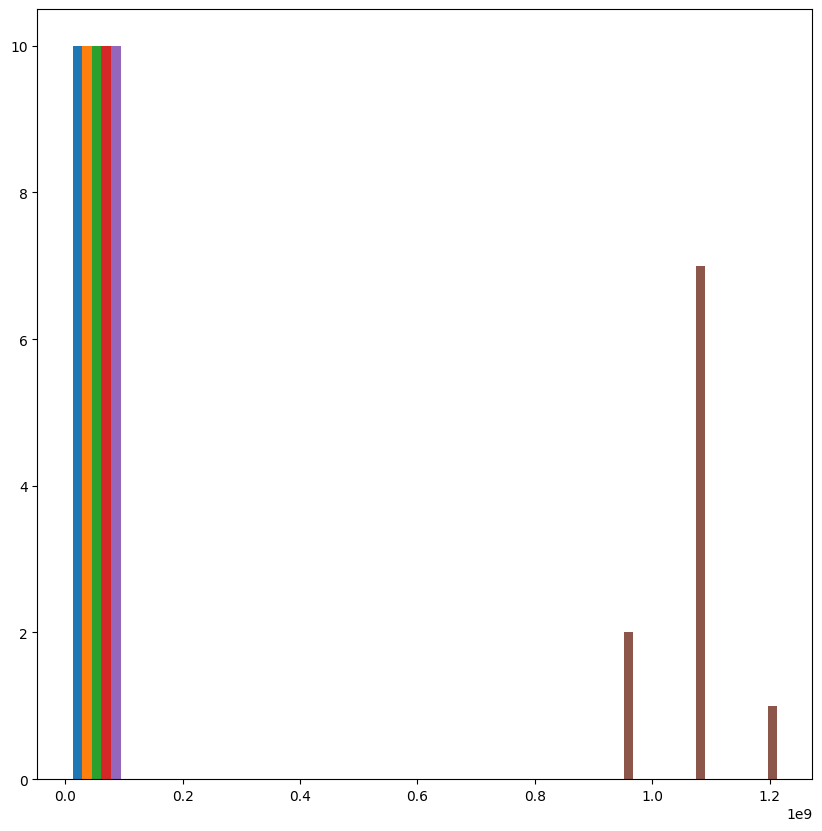

In [20]:
# histogram
plt.figure(figsize=(10,10))
plt.hist(df[:10],
            bottom=None,
            histtype='bar',
            align='mid', orientation='vertical', rwidth=None)

In [21]:
#LSTM is very sensitive neural network so we have to normalize the data set in the same range
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(df)
#class sklearn.preprocessing.MinMaxScaler(feature_range=(0, 1), *, copy=True)
#caler=MinMaxScaler(feature_range=(0,1))
#df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [22]:
df.shape

(5217, 6)

In [23]:
#splitting the dataset into test train 
train=df[0:3000]
test =df[3500:]
#validate=df[2500:2999]

In [24]:
print(test.shape)
print(train.shape)

(1717, 6)
(3000, 6)


(array([[ 423., 1443., 1118.,   16.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [ 431., 1503., 1062.,    4.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [ 425., 1410., 1138.,   27.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [ 422., 1448., 1118.,   12.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [ 422., 1448., 1118.,   12.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [ 969.,  769.,  343.,  480.,  257.,  116.,   44.,   14.,    6.,
            2.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 6 BarContainer objects>)

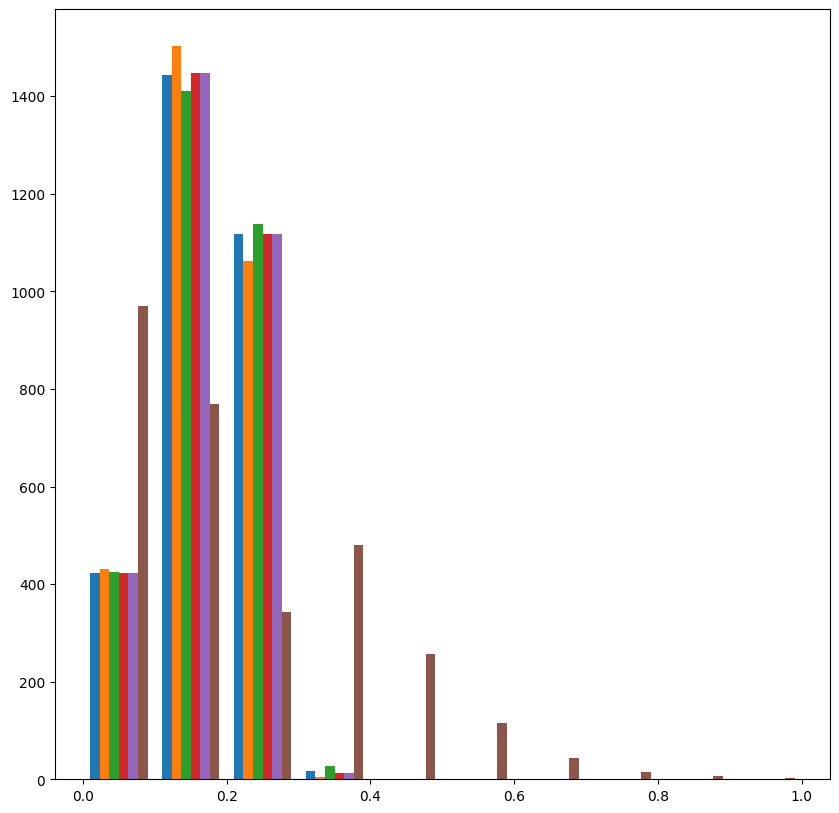

In [25]:
plt.figure(figsize=(10,10))
plt.hist(train,
            bottom=None,
            histtype='bar',
            align='mid', orientation='vertical', rwidth=None)

(array([[  0.,   0.,   0., 264., 498., 222., 252., 314., 116.,  51.],
        [  0.,   0.,   0., 287., 482., 211., 274., 296., 117.,  50.],
        [  0.,   0.,   0., 244., 518., 211., 254., 325., 110.,  55.],
        [  0.,   0.,   0., 272., 494., 218., 275., 297., 111.,  50.],
        [  0.,   0.,   0., 272., 494., 218., 275., 297., 111.,  50.],
        [ 27., 537., 881., 178.,  50.,  23.,  14.,   7.,   0.,   0.]]),
 array([0.08472581, 0.17625323, 0.26778064, 0.35930806, 0.45083548,
        0.5423629 , 0.63389032, 0.72541774, 0.81694516, 0.90847258,
        1.        ]),
 <a list of 6 BarContainer objects>)

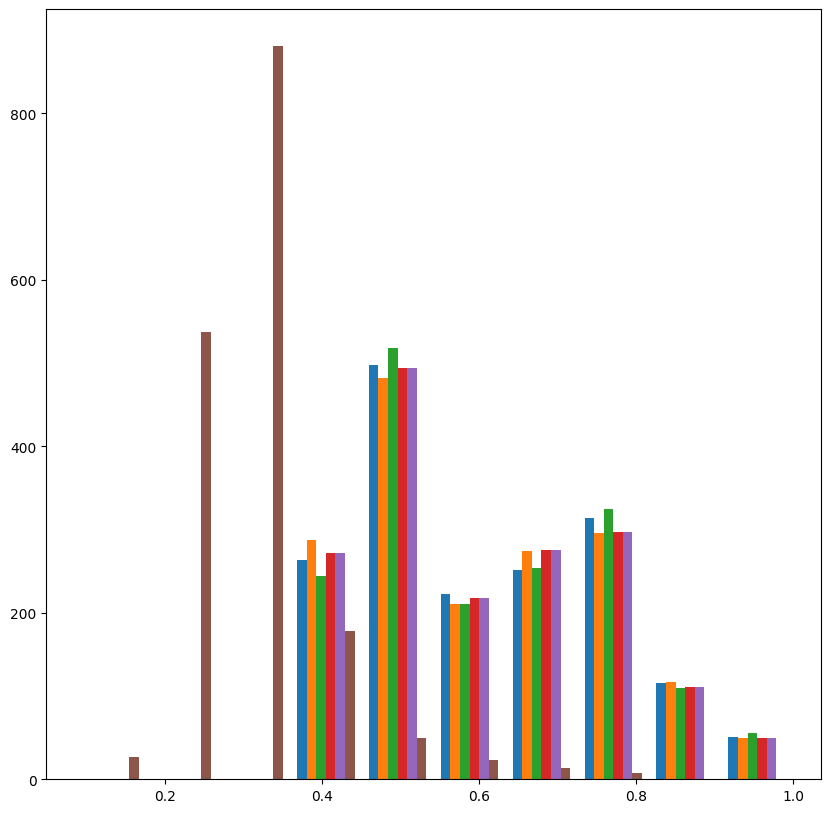

In [26]:
plt.figure(figsize=(10,10))
plt.hist(test,
            bottom=None,
            histtype='bar',
            align='mid', orientation='vertical', rwidth=None)

In [27]:
#scaled_train_samples=scaler.fit_transform(train)
#scaled_test_samples=scaler.fit_transform(test)

In [28]:
import numpy as np
def create_dataset(dataset,time_stamp =1):
  X, Y = [], []
  for i in range(len(dataset)-time_stamp-1):
    a= dataset[i:(i+time_stamp),0]
    X.append(a)
    Y.append(df[i+time_stamp,0])
  return np.array(X),np.array(Y)

In [29]:
time_stamp=100
x_train, y_train=create_dataset(train,time_stamp)
x_test, y_test = create_dataset(test, time_stamp)

In [30]:
print(x_train.shape)
print(x_test.shape)
print(y_train)
print(y_test)

(2899, 100)
(1616, 100)
[0.24944724 0.24337194 0.24215896 ... 0.17788499 0.17932668 0.1967208 ]
[0.24944724 0.24337194 0.24215896 ... 0.24193022 0.24361105 0.24592612]


In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [32]:
print(x_test)
print(x_train)
print(x_train.shape)

[[0.39067256 0.38843719 0.38602857 ... 0.41589207 0.41681048 0.41533757]
 [0.38843719 0.38602857 0.38591418 ... 0.41681048 0.41533757 0.41092928]
 [0.38602857 0.38591418 0.38436851 ... 0.41533757 0.41092928 0.41293243]
 ...
 [0.78033655 0.75891195 0.74016968 ... 0.92449042 0.9281362  0.90324942]
 [0.75891195 0.74016968 0.7588391  ... 0.9281362  0.90324942 0.90677743]
 [0.74016968 0.7588391  0.76378113 ... 0.90324942 0.90677743 0.9152198 ]]
[[0.2737761  0.26891378 0.24957547 ... 0.25218507 0.25002598 0.24071724]
 [0.26891378 0.24957547 0.25050771 ... 0.25002598 0.24071724 0.24944724]
 [0.24957547 0.25050771 0.25097209 ... 0.24071724 0.24944724 0.24337194]
 ...
 [0.23327649 0.2301297  0.22191608 ... 0.17612442 0.16708948 0.1661399 ]
 [0.2301297  0.22191608 0.22012779 ... 0.16708948 0.1661399  0.17788499]
 [0.22191608 0.22012779 0.221268   ... 0.1661399  0.17788499 0.17932668]]
(2899, 100)


In [33]:
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [34]:
print(x_train.shape)
print(y_train.shape)

(2899, 100, 1)
(2899,)


In [35]:
print(x_test.shape)
print(y_test.shape)

(1616, 100, 1)
(1616,)


In [37]:
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [38]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 100, 100)       │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 100)       │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151,451 (591.61 KB)

 Trainable params: 151,451 (591.61 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
history=model.fit(
    x_train,y_train,
    validation_split=0.1,
    shuffle=False, 
    epochs=50,batch_size=16,verbose=1)

Epoch 1/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.0058 - val_loss: 3.6546e-04
Epoch 2/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 3/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 12s 73ms/step - loss: 0.0019 - val_loss: 5.7859e-04
Epoch 4/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 5/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step - loss: 0.0018 - val_loss: 0.0032
Epoch 6/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step - loss: 0.0025 - val_loss: 0.0038
Epoch 7/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 21s 71ms/step - loss: 0.0029 - val_loss: 0.0057
Epoch 8/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step - loss: 0.0038 - val_loss: 0.0067
Epoch 9/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 12s 73ms/step - loss: 0.0050 - val_loss: 0.0056
Epoch 10/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step - loss: 0.0042 - val_loss: 0.0053
Epoch 11/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 12s 73ms/step - loss: 0.0042 - val_loss: 0.0047
Epoch 12/50
164/164 ━━

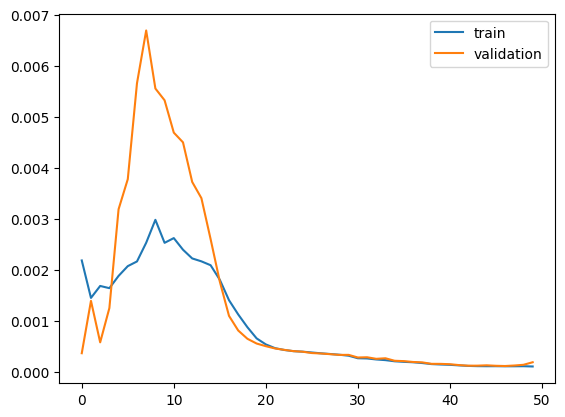

In [40]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()

In [41]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step


In [42]:
test_predict.shape

(1616, 1)

In [43]:
#calcualtion of RMSE
import math
from sklearn.metrics import mean_squared_error, precision_score,recall_score,f1_score
math.sqrt(mean_squared_error(y_train,train_predict))
from sklearn.metrics import confusion_matrix
x=confusion_matrix=(x_test, model.predict(x_test))

51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step


In [44]:
print(x)

(array([[[0.39067256],
        [0.38843719],
        [0.38602857],
        ...,
        [0.41589207],
        [0.41681048],
        [0.41533757]],

       [[0.38843719],
        [0.38602857],
        [0.38591418],
        ...,
        [0.41681048],
        [0.41533757],
        [0.41092928]],

       [[0.38602857],
        [0.38591418],
        [0.38436851],
        ...,
        [0.41533757],
        [0.41092928],
        [0.41293243]],

       ...,

       [[0.78033655],
        [0.75891195],
        [0.74016968],
        ...,
        [0.92449042],
        [0.9281362 ],
        [0.90324942]],

       [[0.75891195],
        [0.74016968],
        [0.7588391 ],
        ...,
        [0.9281362 ],
        [0.90324942],
        [0.90677743]],

       [[0.74016968],
        [0.7588391 ],
        [0.76378113],
        ...,
        [0.90324942],
        [0.90677743],
        [0.9152198 ]]]), array([[0.35656434],
       [0.35394502],
       [0.35417914],
       ...,
       [0.67841494],
       

In [45]:
math.sqrt(mean_squared_error(y_test,test_predict))

0.3557326116131619

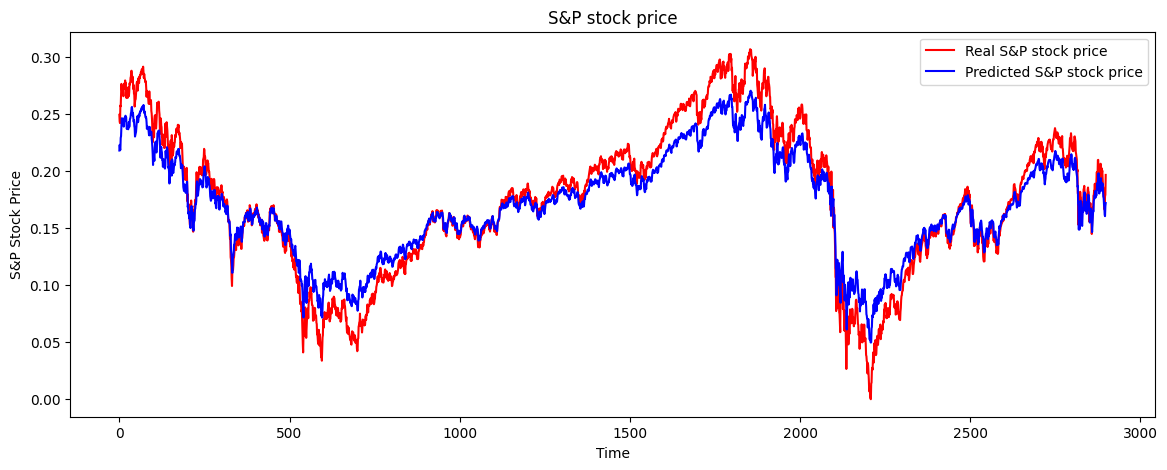

In [46]:

# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_train, color = 'red', label = 'Real S&P stock price')
plt.plot(train_predict, color = 'blue', label = 'Predicted S&P stock price')
plt.title('S&P stock price')
plt.xlabel('Time')
plt.ylabel('S&P Stock Price')
plt.legend()
plt.show()

In [48]:
model=Sequential()
model.add(tf.keras.layers.GRU(100,return_sequences=True,input_shape=(100,1)))
model.add(tf.keras.layers.GRU(50,return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [1]:
history=model.fit(
    x_train,y_train,
    validation_split=0.1,
    shuffle=False, 
    epochs=50,batch_size=16,verbose=1)

NameError: name 'model' is not defined

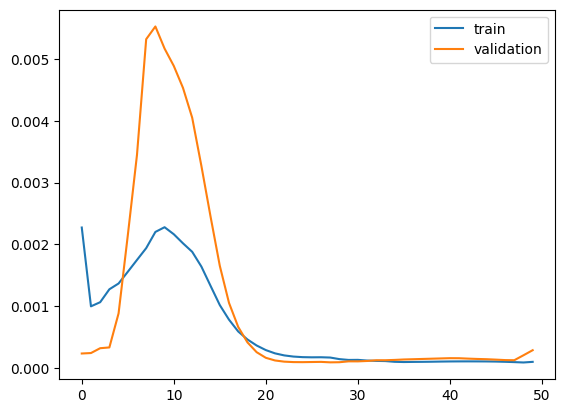

In [50]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()

In [51]:
train_predict.shape

(2899, 1)

In [52]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [53]:
math.sqrt(mean_squared_error(y_train,train_predict))

0.018254505879125027

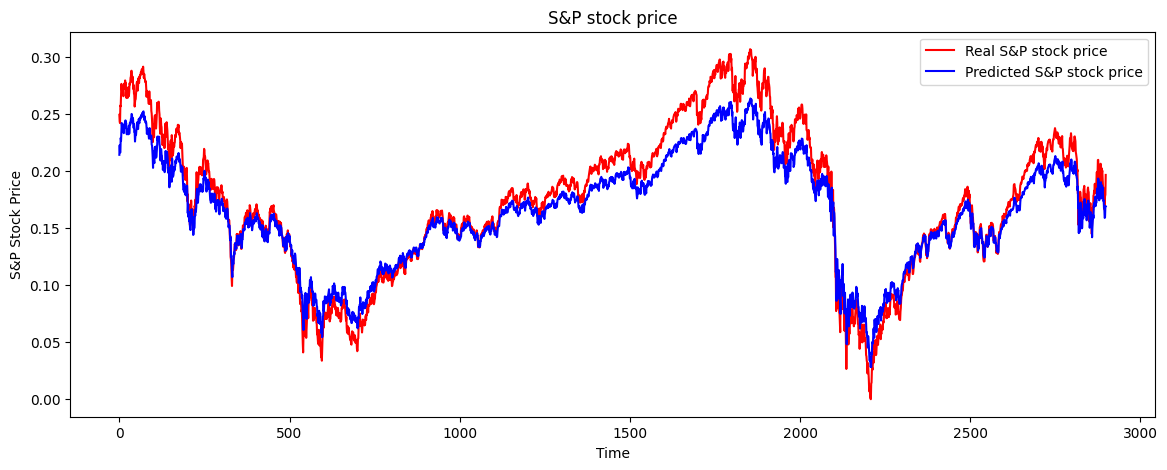

In [54]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_train, color = 'red', label = 'Real S&P stock price')
plt.plot(train_predict, color = 'blue', label = 'Predicted S&P stock price')
plt.title('S&P stock price')
plt.xlabel('Time')
plt.ylabel('S&P Stock Price')
plt.legend()
plt.show()

In [56]:
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(100,1)))
model.add(layer = tf.keras.layers.Dropout(.2,))
model.add(tf.keras.layers.GRU(50,return_sequences=False))
model.add(tf.keras.layers.Dropout(.2,))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))

In [57]:
history=model.fit(
    x_train,y_train,
    validation_split=0.1,
    shuffle=False, 
    epochs=20,batch_size=16,verbose=1,)

Epoch 1/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 15s 68ms/step - loss: 0.0079 - val_loss: 2.3851e-04
Epoch 2/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 0.0012 - val_loss: 3.5457e-04
Epoch 3/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 4/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - loss: 0.0018 - val_loss: 0.0028
Epoch 5/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - loss: 0.0024 - val_loss: 0.0041
Epoch 6/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 0.0030 - val_loss: 0.0056
Epoch 7/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - loss: 0.0037 - val_loss: 0.0058
Epoch 8/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 0.0039 - val_loss: 0.0054
Epoch 9/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0038 - val_loss: 0.0051
Epoch 10/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0038 - val_loss: 0.0046
Epoch 11/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.0034 - val_loss: 0.0040
Epoch 12/20
164/164 ━━━━━━

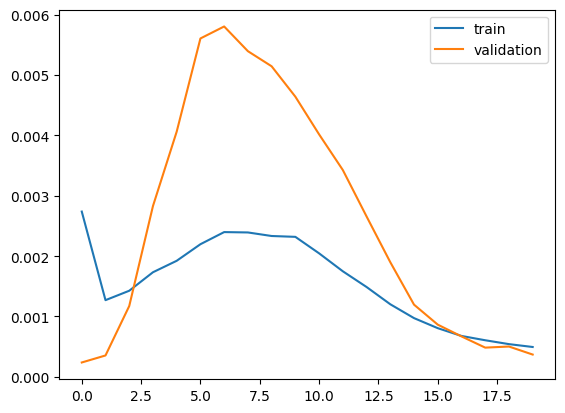

In [58]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()

In [59]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [60]:
print(train_predict.shape)
print(test_predict.shape)

(2899, 1)
(1616, 1)


In [61]:
math.sqrt(mean_squared_error(y_train,train_predict))

0.02548486297319262

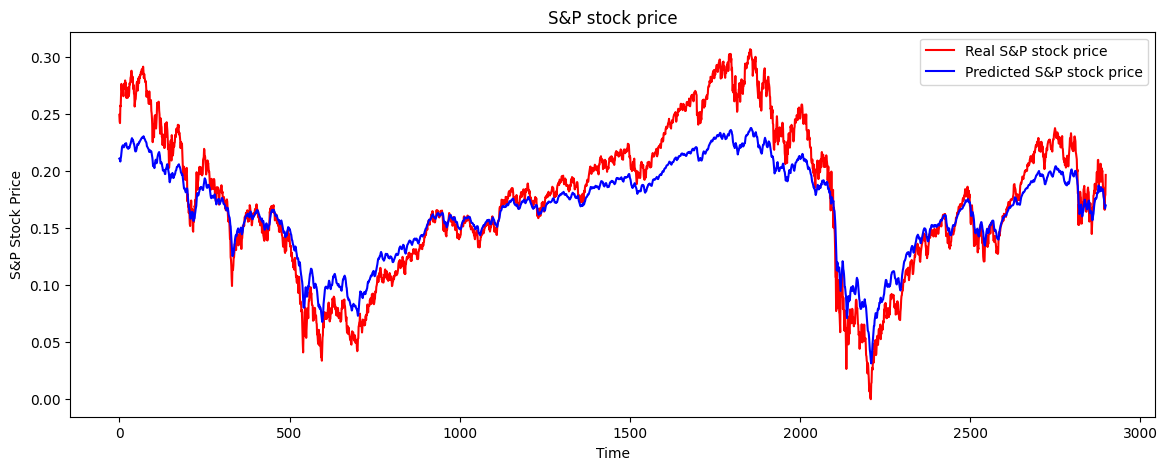

In [62]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_train, color = 'red', label = 'Real S&P stock price')
plt.plot(train_predict, color = 'blue', label = 'Predicted S&P stock price')
plt.title('S&P stock price')
plt.xlabel('Time')
plt.ylabel('S&P Stock Price')
plt.legend()
plt.show()